In [ ]:
pip install anvil-uplink

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.9 MB/s eta 0:00:00


In [ ]:
import anvil.server

anvil.server.connect("server_GFZJ6R3JFEAQB2EYVRSV3ZYM-EN2JVWZL2Z6LZHFK")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [ ]:
from zipfile import ZipFile
file_name = "/content/hewann.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path ke direktori dataset
train_dir = '/content/hewan/dataset/training_set'
test_dir = '/content/hewan/dataset/test_set'

# Ukuran input gambar
img_width, img_height = 150, 150
batch_size = 32

# ImageDataGenerator untuk augmentasi training dan normalisasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load gambar dari direktori
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Ambil jumlah kelas (kelas = nama folder di training_set)
num_classes = len(train_data.class_indices)

# Define the model structure
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Use the num_classes defined earlier
model.add(Dense(num_classes, activation='softmax'))

# Compile the model (Moved to the same cell as model definition for clarity)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=30, validation_data=test_data)

Found 2655 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 254ms/step - accuracy: 0.6049 - loss: 0.9280 - val_accuracy: 0.3867 - val_loss: 1.0946
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 19s 229ms/step - accuracy: 0.6526 - loss: 0.7632 - val_accuracy: 0.3500 - val_loss: 1.1824
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 19s 228ms/step - accuracy: 0.6720 - loss: 0.6748 - val_accuracy: 0.6400 - val_loss: 0.7032
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 216ms/step - accuracy: 0.7098 - loss: 0.6059 - val_accuracy: 0.5867 - val_loss: 1.0236
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 19s 228ms/step - accuracy: 0.7781 - loss: 0.4700 - val_accuracy: 0.6700 - val_loss: 0.6536
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 217ms/step - accuracy: 0.7957 - loss: 0.4466 - val_accuracy: 0.6700 - val_loss: 0.6978
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 19s 230ms/step - accuracy: 0.8369 - loss: 0.3564 - val_accuracy: 0.6100 - val_loss: 1.2015
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 220ms/step - accuracy: 0.8132 - loss: 0.4092 - val_accu

In [ ]:
# Simpan model
model.save('animal_classification_model.h5')
print("✅ Model berhasil disimpan.")

✅ Model berhasil disimpan.


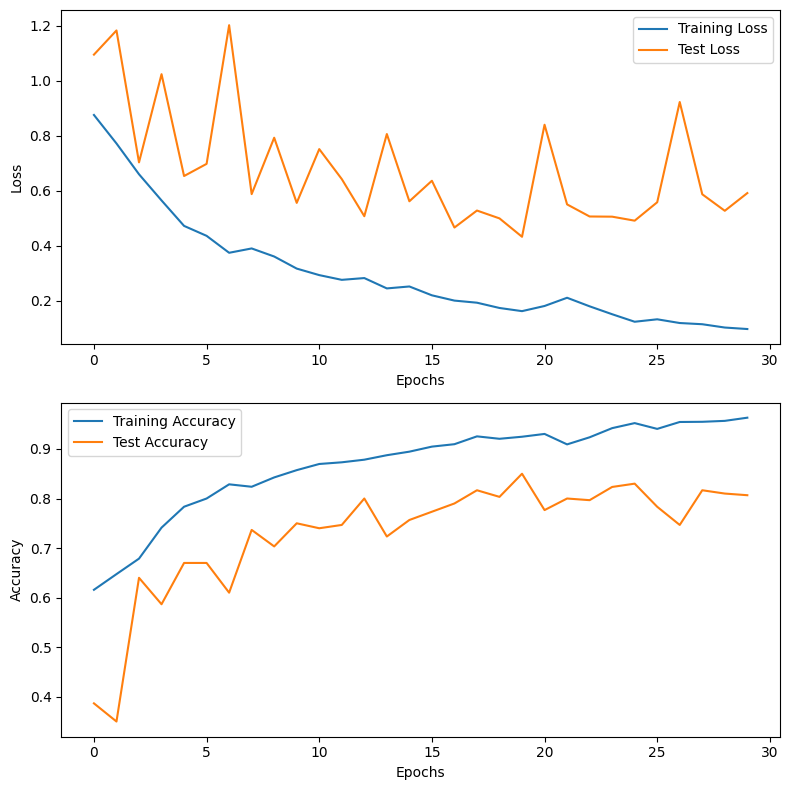

In [24]:
# Mengakses metrik pelatihan dari history
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

import matplotlib.pyplot as plt # Import matplotlib here

# Visualisasi loss dan akurasi dalam satu gambar dengan subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot loss
ax1.plot(train_loss, label='Training Loss')
ax1.plot(test_loss, label='Test Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot akurasi
ax2.plot(train_acc, label='Training Accuracy')
ax2.plot(test_acc, label='Test Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [25]:
# Evaluasi performa model pada data pengujian
test_loss, test_acc = model.evaluate(test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8350 - loss: 0.5384
Test loss: 0.5916218757629395
Test accuracy: 0.8066666722297668


In [26]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# Mengambil prediksi kelas untuk data validasi
val_predictions = model.predict(test_data)
val_pred_labels = tf.argmax(val_predictions, axis=1)
val_true_labels = test_data.labels

# Menghitung nilai f1-score, recall, presisi, dan confusion matrix
report = classification_report(val_true_labels, val_pred_labels)
print('Classification Report:')
print(report)

conf_matrix = confusion_matrix(val_true_labels, val_pred_labels)
print('Confusion Matrix:')
print(conf_matrix)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.34      0.34       100
           1       0.35      0.30      0.32       100
           2       0.35      0.41      0.38       100

    accuracy                           0.35       300
   macro avg       0.35      0.35      0.35       300
weighted avg       0.35      0.35      0.35       300

Confusion Matrix:
[[34 30 36]
 [31 30 39]
 [33 26 41]]


Saving 11.jpg to 11.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


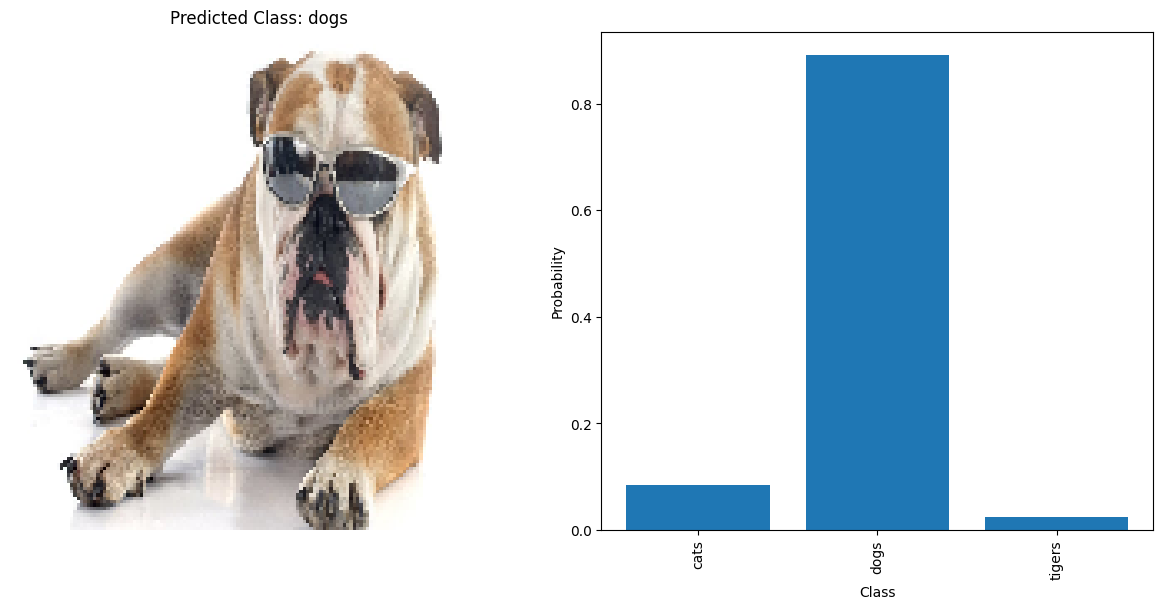

In [ ]:
# 11. Fungsi Prediksi Gambar dari Upload
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np # Import numpy here
import os # Import os here

def test_image():
    # Upload file dari lokal
    uploaded = files.upload()

    # Iterate directly over the keys (filenames) of the uploaded dictionary
    for fn in uploaded.keys():
        img_path = fn
        break  # hanya ambil satu gambar pertama

    # Load dan preprocess image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Prediksi
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    probabilities = prediction[0]

    # Ambil label kelas dari folder
    class_labels = sorted(os.listdir(train_dir))

    # Tampilkan hasil prediksi
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(img_array[0])
    ax1.axis('off')
    ax1.set_title('Predicted Class: ' + class_labels[predicted_class])

    ax2.bar(range(len(class_labels)), probabilities)
    ax2.set_xticks(range(len(class_labels)))
    ax2.set_xticklabels(class_labels, rotation=90)
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Probability')

    plt.tight_layout()
    plt.show()

# 12. Jalankan Prediksi Upload Manual
test_image()

In [21]:
import anvil.server
import base64
from tensorflow.keras.preprocessing import image
import io
import numpy as np
import os
import tensorflow as tf

# Hubungkan ke Anvil
anvil.server.connect("server_GFZJ6R3JFEAQB2EYVRSV3ZYM-EN2JVWZL2Z6LZHFK")

# === MUAT MODEL & LABEL ===
# Load the saved model instead of an image file
try:
    model = tf.keras.models.load_model('animal_classification_model.h5')  # Load the .h5 model file
    train_dir = '/content/hewan/dataset/training_set'  # sesuaikan jika beda
    class_labels = sorted(os.listdir(train_dir))
except Exception as e:
    print(f"Error loading model or class labels for Anvil: {e}")
    model = None
    class_labels = None


@anvil.server.callable
def klasifikasi_hewan(gambar_base64):
    if model is None or class_labels is None:
        return {"error": "Model or class labels failed to load."} # Return an error if loading failed

    img_bytes = base64.b64decode(gambar_base64)
    img = image.load_img(io.BytesIO(img_bytes), target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    # Use the class_labels loaded after the model
    # class_labels = sorted(os.listdir(train_dir)) # No need to redefine here if loaded globally

    hasil = {
        "kelas": class_labels[predicted_index],
        "probabilitas": {
            class_labels[i]: float(prediction[0][i])
            for i in range(len(class_labels))
        }
    }
    return hasil

# Jalankan server Anvil
# Only wait forever if the model was loaded successfully
if model is not None and class_labels is not None:
    print("Anvil server running...")
    anvil.server.wait_forever()
else:
    print("Anvil server not started due to model loading error.")

Anvil server running...


KeyboardInterrupt: 